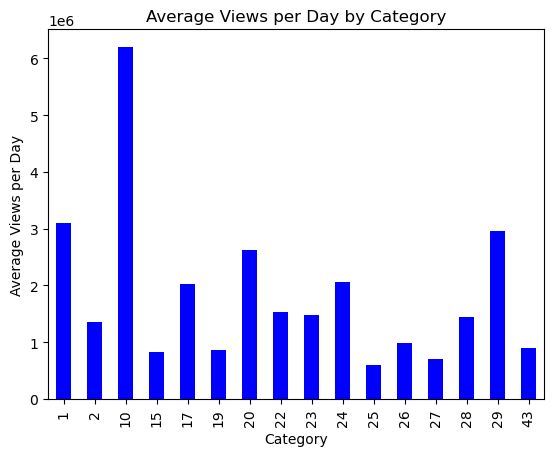

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
df = pd.read_csv('USvideos.csv')

# Convert the date format to a datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Create a new column with the number of days the video has been trending
df['days_trending'] = (df['trending_date'].max() - df['trending_date']).dt.days

# Group the data by category and calculate the average number of views, likes, and comments per day
grouped = df.groupby(['category_id'])[['views', 'likes', 'days_trending']].mean()

# Create a bar chart of the average views per day by category
grouped['views'].plot(kind='bar', color='blue')
plt.title('Average Views per Day by Category')
plt.xlabel('Category')
plt.ylabel('Average Views per Day')
plt.show()

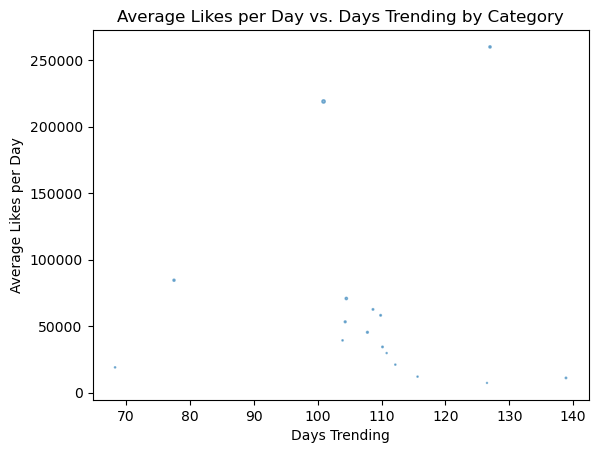

In [3]:
# Create a scatter plot of the average likes per day vs. days trending by category
plt.scatter(grouped['days_trending'], grouped['likes'], s=grouped['views']/1000000, alpha=0.5)
plt.title('Average Likes per Day vs. Days Trending by Category')
plt.xlabel('Days Trending')
plt.ylabel('Average Likes per Day')
plt.show()

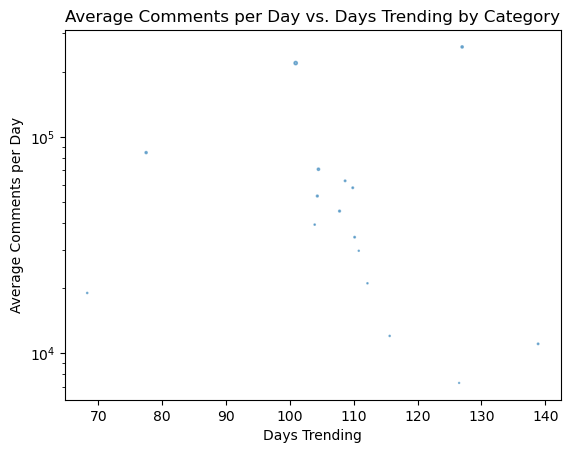

In [4]:
# Create a scatter plot of the average comments per day vs. days trending by category, using a log scale for the y-axis
plt.scatter(grouped['days_trending'], grouped['likes'], s=grouped['views']/1000000, alpha=0.5)
plt.title('Average Comments per Day vs. Days Trending by Category')
plt.xlabel('Days Trending')
plt.ylabel('Average Comments per Day')
plt.yscale('log')
plt.show()

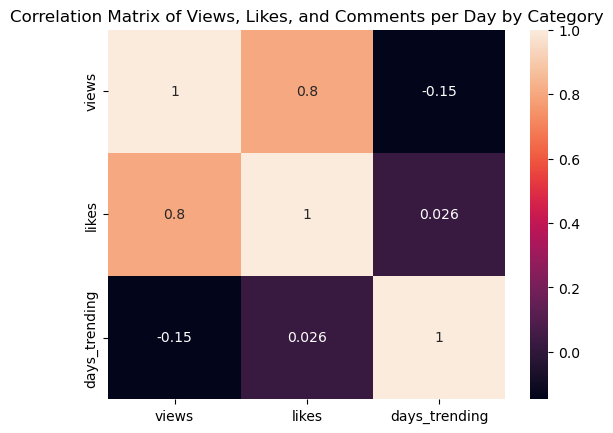

In [5]:
# Create a heatmap of the correlation matrix for the average views, likes, and comments per day by category
sns.heatmap(grouped.corr(), annot=True)
plt.title('Correlation Matrix of Views, Likes, and Comments per Day by Category')
plt.show()

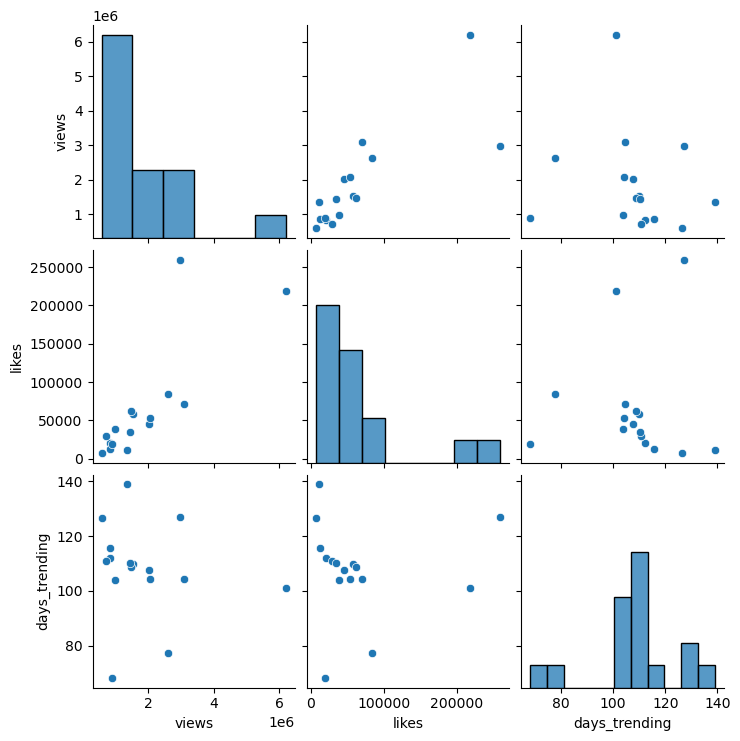

In [6]:
# Create a pair plot of the average views, likes, and comments per day by category
sns.pairplot(grouped)
plt.show()